In [121]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score

In [15]:
warnings.filterwarnings('ignore')

In [2]:
rain=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [31]:
#Setting this option to show maximum rows and maximum columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [32]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [33]:
rain.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425,8425,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434,7434.000000,7596,8117,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8185,8186
unique,3004,12,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2011-06-17,Melbourne,NaN,NaN,NaN,NaN,NaN,N,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,5,1622,NaN,NaN,NaN,NaN,NaN,713,NaN,906,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6195,6195
mean,NaN,NaN,13.193305,23.859976,2.805913,5.389395,7.632205,NaN,40.174469,NaN,NaN,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,NaN,NaN
std,NaN,NaN,5.403596,6.136408,10.459379,5.044484,3.896235,NaN,14.665721,NaN,NaN,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,NaN,NaN
min,NaN,NaN,-2.000000,8.200000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,NaN,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,NaN,NaN
25%,NaN,NaN,9.200000,19.300000,0.000000,2.600000,4.750000,NaN,30.000000,NaN,NaN,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,NaN,NaN
50%,NaN,NaN,13.300000,23.300000,0.000000,4.600000,8.700000,NaN,39.000000,NaN,NaN,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,NaN,NaN
75%,NaN,NaN,17.400000,28.000000,1.000000,7.000000,10.700000,NaN,50.000000,NaN,NaN,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,NaN,NaN


In [7]:
rain.shape

(8425, 23)

# Handling Null Values

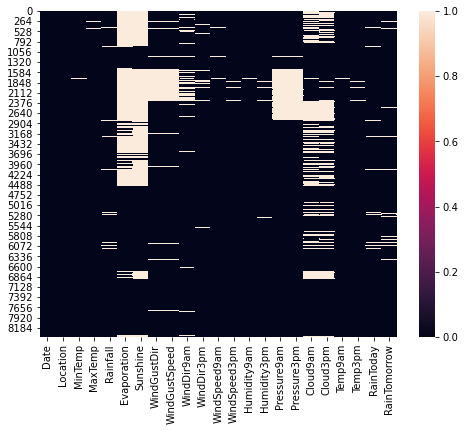

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(rain.isnull())
plt.show()

Null values are present in some columns

In [56]:
for i in rain.columns:
    if rain[i].dtype == 'O':
        rain[i].fillna(rain[i].mode()[0],inplace=True)
    elif i == 'Rainfall' or i == 'Evaporation':
        rain[i].fillna(rain[i].median(),inplace=True)
    else:
      rain[i].fillna(rain[i].mean(),inplace=True)  

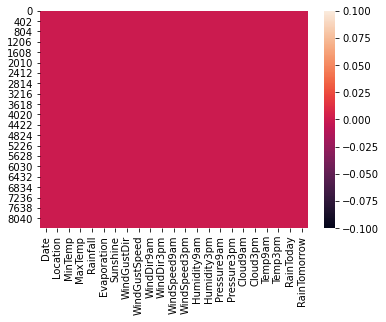

In [58]:
sns.heatmap(rain.isnull())
plt.show()

# Exploratory Data Analysis

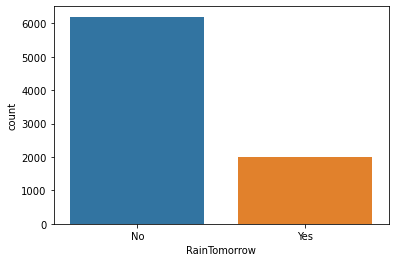

In [16]:
sns.countplot(rain['RainTomorrow'])
plt.show()

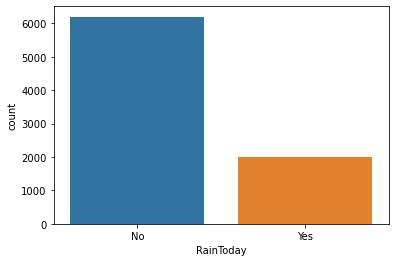

In [17]:
sns.countplot(rain['RainToday'])
plt.show()

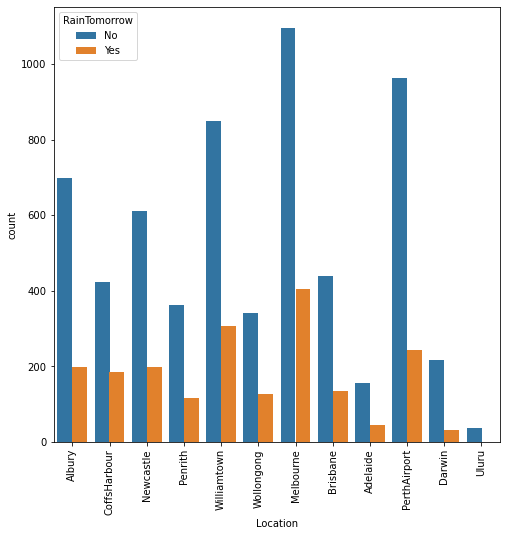

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(rain['Location'],hue=rain['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

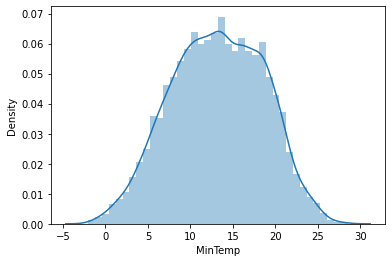

In [25]:
sns.distplot(rain['MinTemp'])
plt.show() 

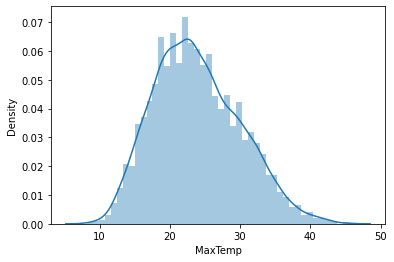

In [26]:
sns.distplot(rain['MaxTemp'])
plt.show()

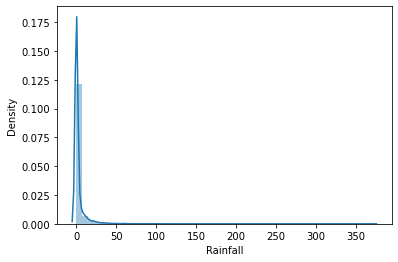

In [29]:
sns.distplot(rain['Rainfall'])
plt.show()

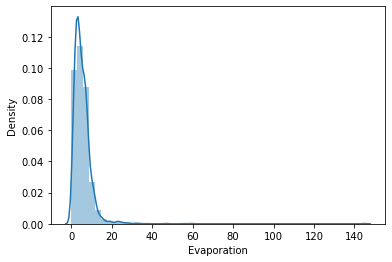

In [30]:
sns.distplot(rain['Evaporation'])
plt.show()

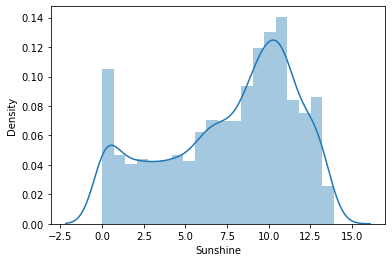

In [34]:
sns.distplot(rain['Sunshine'])
plt.show()

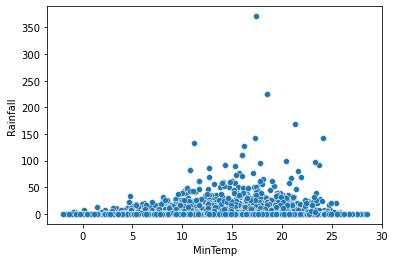

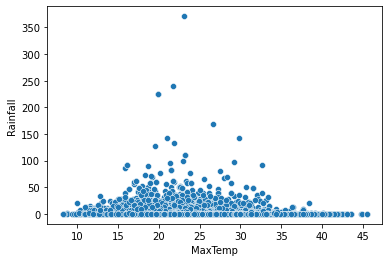

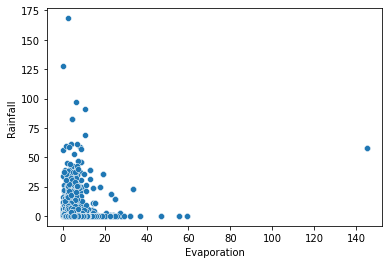

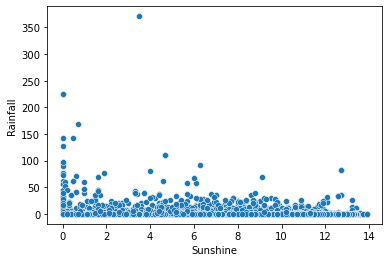

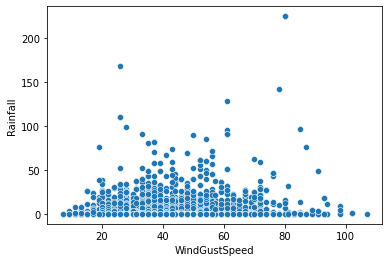

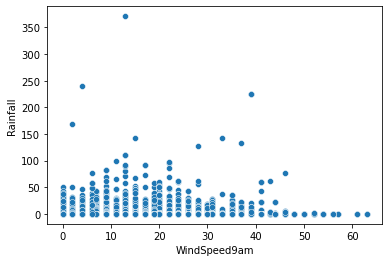

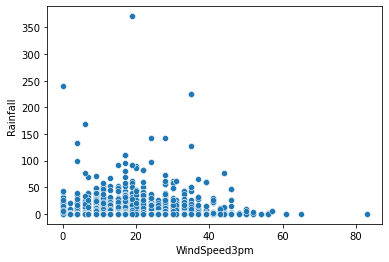

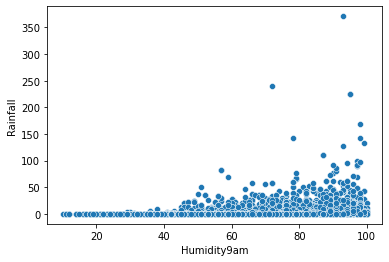

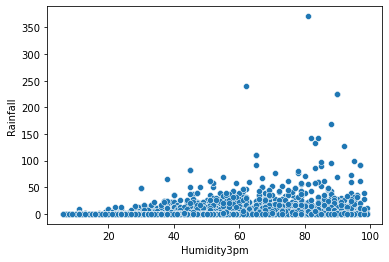

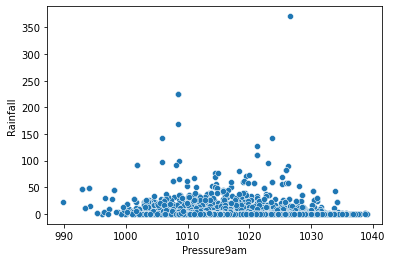

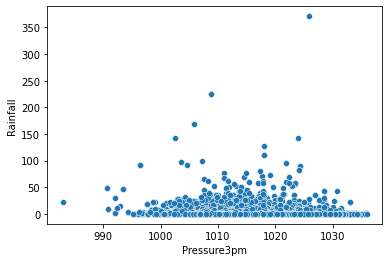

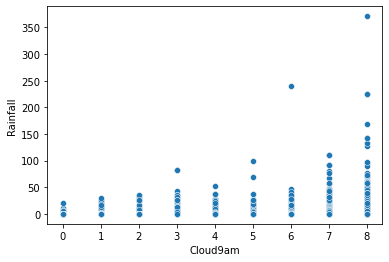

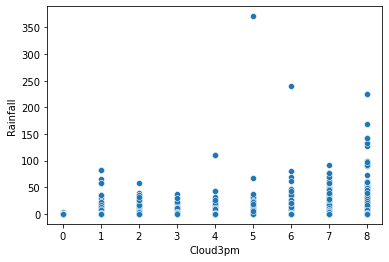

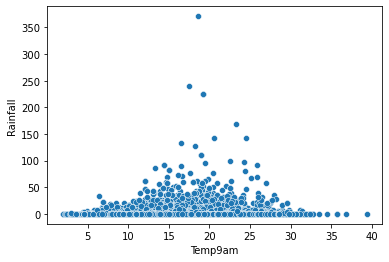

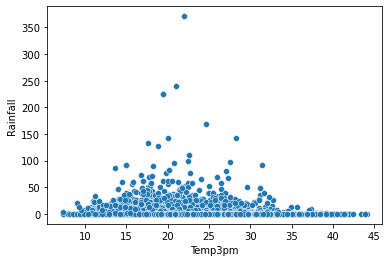

In [43]:
for i in rain.columns:
    if rain[i].dtype==float and i!='Rainfall':
        sns.scatterplot(x=i,y='Rainfall',data=rain)
        plt.show()

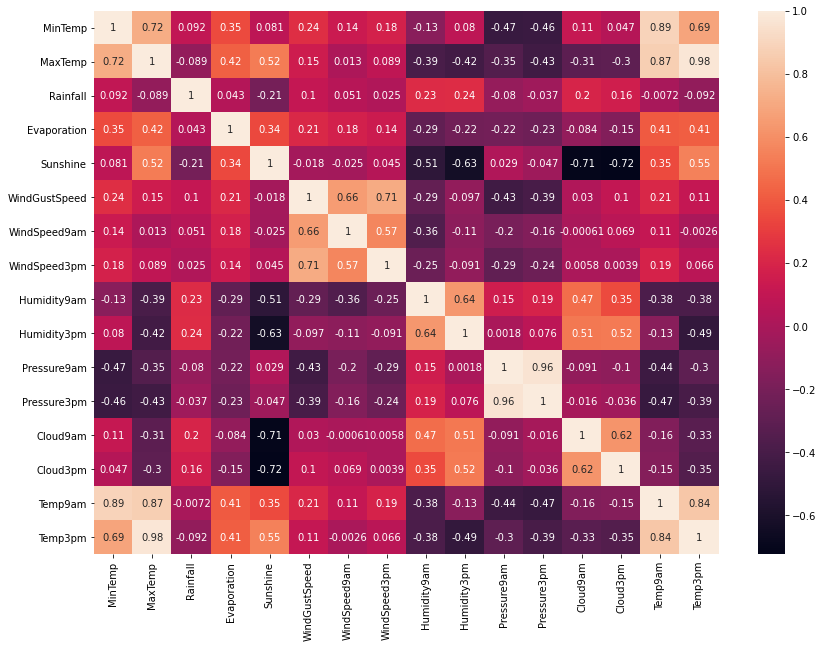

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(rain.corr(),annot=True)
plt.show()

# Changing categorical variables to Numeric

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in rain.columns:
    if rain[i].dtype==object:
        rain[i]=le.fit_transform((rain[i].astype(str)))

In [61]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


# Handling Outliers

In [64]:
from scipy.stats import zscore
threshold=3
z=np.absolute(zscore(rain))
rain_new=rain[(z<3).all(axis=1)]

In [66]:
print('Data_loss',(rain.shape[0]-rain_new.shape[0])*100/rain.shape[0],'%')

Data_loss 5.198813056379822 %


# Model for predicting RainTomorrow

**Spliting the Data into features and Vectors**

In [67]:
x=rain_new.drop('RainTomorrow',axis=1)
y=rain_new['RainTomorrow']

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 43)

**LogisticRegression**

In [93]:
log = LogisticRegression()
log.fit(xtrain , ytrain)
pred_l = log.predict(xtest)
acc_l = accuracy_score(ytest , pred_l)*100
print('Accuracy Score: ',acc_l,'%\n\n')
print(confusion_matrix(ytest , pred_l),'\n\n')
print(classification_report(ytest , pred_l))

Accuracy Score:  83.4793491864831 %


[[1173   62]
 [ 202  161]] 


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1235
           1       0.72      0.44      0.55       363

    accuracy                           0.83      1598
   macro avg       0.79      0.70      0.72      1598
weighted avg       0.82      0.83      0.82      1598



**RandomForestClassifier**

In [94]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(xtrain, ytrain)
pred_r = random_forest.predict(xtest)
acc_r = accuracy_score(ytest , pred_r)*100
print('Accuracy Score: ',acc_r,'%\n\n')
print(confusion_matrix(ytest , pred_r),'\n\n')
print(classification_report(ytest , pred_r))

Accuracy Score:  88.73591989987484 %


[[1201   34]
 [ 146  217]] 


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1235
           1       0.86      0.60      0.71       363

    accuracy                           0.89      1598
   macro avg       0.88      0.79      0.82      1598
weighted avg       0.89      0.89      0.88      1598



**KNeighborsClassifier**

In [95]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(xtrain, ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)*100
print('Accuracy Score: ',acc_knn,'%\n\n')
print(confusion_matrix(ytest , pred_knn),'\n\n')
print(classification_report(ytest , pred_knn))

Accuracy Score:  82.97872340425532 %


[[1195   40]
 [ 232  131]] 


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1235
           1       0.77      0.36      0.49       363

    accuracy                           0.83      1598
   macro avg       0.80      0.66      0.69      1598
weighted avg       0.82      0.83      0.81      1598



**DecisionTreeClassifier**

In [96]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(xtrain, ytrain)
pred_dt =decisiontree.predict(xtest)
acc_dt = accuracy_score(ytest , pred_dt)*100
print('Accuracy Score: ',acc_dt,'%\n\n')
print(confusion_matrix(ytest , pred_dt),'\n\n')
print(classification_report(ytest , pred_dt))

Accuracy Score:  83.79224030037547 %


[[1124  111]
 [ 148  215]] 


              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1235
           1       0.66      0.59      0.62       363

    accuracy                           0.84      1598
   macro avg       0.77      0.75      0.76      1598
weighted avg       0.83      0.84      0.83      1598



In [97]:
#Cross Validation score for random_forest
for j in range(2,10):
    lsscore=cross_val_score(random_forest,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_r,'\n\n')

At cv:- 2
cross validation score is:- 80.18094008029324
accuracy_score is:- 88.73591989987484 


At cv:- 3
cross validation score is:- 84.08700863010456
accuracy_score is:- 88.73591989987484 


At cv:- 4
cross validation score is:- 80.25596134682986
accuracy_score is:- 88.73591989987484 


At cv:- 5
cross validation score is:- 84.56234820764529
accuracy_score is:- 88.73591989987484 


At cv:- 6
cross validation score is:- 79.87924062304228
accuracy_score is:- 88.73591989987484 


At cv:- 7
cross validation score is:- 85.41379742080882
accuracy_score is:- 88.73591989987484 


At cv:- 8
cross validation score is:- 86.76709023652911
accuracy_score is:- 88.73591989987484 


At cv:- 9
cross validation score is:- 88.90844057134925
accuracy_score is:- 88.73591989987484 




In [98]:
#Cross Validation score for LogisticRegression
for j in range(2,10):
    lsscore=cross_val_score(log,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_l,'\n\n')

At cv:- 2
cross validation score is:- 79.94286383243787
accuracy_score is:- 83.4793491864831 


At cv:- 3
cross validation score is:- 81.63250201559075
accuracy_score is:- 83.4793491864831 


At cv:- 4
cross validation score is:- 82.1087781471807
accuracy_score is:- 83.4793491864831 


At cv:- 5
cross validation score is:- 82.20849794240294
accuracy_score is:- 83.4793491864831 


At cv:- 6
cross validation score is:- 81.93267459796384
accuracy_score is:- 83.4793491864831 


At cv:- 7
cross validation score is:- 82.0333041191937
accuracy_score is:- 83.4793491864831 


At cv:- 8
cross validation score is:- 82.49647443034216
accuracy_score is:- 83.4793491864831 


At cv:- 9
cross validation score is:- 82.77231572045552
accuracy_score is:- 83.4793491864831 




In [99]:
lsscore_selected =cross_val_score(log,x,y,cv=9).mean()
print('The cv Score is:-',lsscore_selected*100,'\nThe accuracy score is:-',acc_l)

The cv Score is:- 82.77231572045552 
The accuracy score is:- 83.4793491864831


**ROC AUC Curve:**

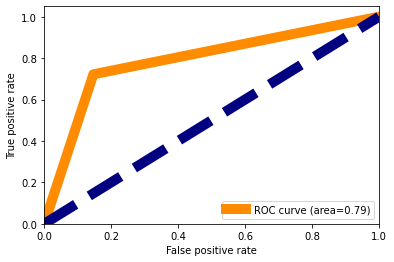

In [100]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_l,ytest)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

# Saving The Best Model 

In [101]:
import pickle
filename='rainfall_prediction.pkl'
pickle.dump(log,open(filename,'wb'))

# Conclusion:

In [102]:
a=np.array(ytest)
predicted=np.array(log.predict(xtest))
df_com=pd.DataFrame({'original':a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,1,1
1,1,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


# Model for predicting Rainfall

In [105]:
x1=rain_new.drop('Rainfall',axis=1)
y1=rain_new['Rainfall']

In [133]:
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size = 0.2, random_state = 12)

In [134]:
lin = LinearRegression()
lin.fit(x1train , y1train)
pred_li = lin.predict(x1test)

In [135]:
print('error:',mean_absolute_error(y1test,lin.predict(x1test)))
mean_absolute_error(y1test,lin.predict(x1test))
mean_squared_error(y1test,lin.predict(x1test))

error: 1.6070553889768127


12.288965755612871

In [137]:
accuracy=r2_score(pred_li,y1test)

In [138]:
for j in range(2,10):
    lsscore=cross_val_score(lin,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',accuracy,'\n\n')

At cv:- 2
cross validation score is:- 26.601550485261487
accuracy_score is:- -0.10644543095519099 


At cv:- 3
cross validation score is:- 27.741916926670946
accuracy_score is:- -0.10644543095519099 


At cv:- 4
cross validation score is:- 28.402976156857207
accuracy_score is:- -0.10644543095519099 


At cv:- 5
cross validation score is:- 28.840587129350702
accuracy_score is:- -0.10644543095519099 


At cv:- 6
cross validation score is:- 29.080521648570183
accuracy_score is:- -0.10644543095519099 


At cv:- 7
cross validation score is:- 28.966886708427353
accuracy_score is:- -0.10644543095519099 


At cv:- 8
cross validation score is:- 29.36944704198433
accuracy_score is:- -0.10644543095519099 


At cv:- 9
cross validation score is:- 29.60095845343368
accuracy_score is:- -0.10644543095519099 


